In [1]:
import csv
import matplotlib.pyplot as plt 
import os
import io
import requests
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

  
def load_data(filename, inputs_variables_names=['Economy..GDP.per.Capita.', 'Freedom'],
              output_variable_name='Happiness.Score'):
    data = []
    data_names = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                data_names = row
            else:
                data.append(row)
            line_count += 1

    selected_variables_index = [data_names.index(variable) for variable in inputs_variables_names]
    inputs = []
    for var in selected_variables_index:
        inputs.append([data[index][var] for index in range(len(data))])

    output_selected_index = data_names.index(output_variable_name)
    outputs = [data[index][output_selected_index] for index in range(len(data))]

    return inputs, outputs

def fromStringToNumericData(values,exc=[]):
    if isinstance(values[0], list):
        aux = []

        excluded = []
        for i in range(len(values)):
            for j in range(len(values[i])):
                if(values[i][j]==""):
                    excluded.append(j)

        for i in range(len(values)):
            line = []
            for j in range(len(values[i])): 
                if((j not in excluded) and (j not in exc)):
                    line.append(float(values[i][j]))
                    
            aux.append(line)

        return aux,excluded
    else:
        aux = []

        excluded1d=[]
        for i in range(len(values)):
            if (values[i]==""):
                excluded1d.append(i)
        for i in range(len(values)):
            if ((i not in excluded1d) and (i not in exc)):
                aux.append(float(values[i]))

        return aux,excluded1d

def plot_histogram(x, name):
    plt.hist(x, 10)
    plt.title('Histogram of ' + name)
    plt.show()

def plot(ins, outs):
    print(ins[0][:5])
    print(ins[1][:5])
    print(outs[:5])

    plot_histogram(ins[0], 'GDP per capita')
    plot_histogram(ins[1], 'Freedom')
    plot_histogram(outs, 'Happiness')

    plt.plot(ins[0], outs, 'ro')
    plt.xlabel('GDP capita')
    plt.ylabel('Happiness')
    plt.show()

    plt.plot(ins[1], outs, 'ro')
    plt.xlabel('Freedom')
    plt.ylabel('Happiness')
    plt.show()

In [2]:
def fit(x,y):
    n = len(x)
    sx1 = 0.0
    sx2 = 0.0
    sx1_sq = 0.0
    sx1x2 = 0.0
    sx2_sq = 0.0
    sy = 0.0
    sx1y = 0.0
    sx2y = 0.0

    for i in range(n):
        #AtA
        sx1 += x[i][0]
        sx2 += x[i][1]
        sx1_sq += x[i][0]*x[i][0]
        sx1x2 += x[i][0]*x[i][1]
        sx2_sq += x[i][1]*x[i][1]
        #AtZ
        sy += y[i]
        sx1y += x[i][0]*y[i]
        sx2y += x[i][1]*y[i]
        
    det = (n*sx1_sq*sx2_sq)+(sx1*sx1x2*sx2)+(sx2*sx1*sx1x2)-(sx2*sx2*sx1_sq)-(n*sx1x2*sx1x2)-(sx1*sx1*sx2_sq)
    if(det==0):
        raise Exception("Determinant == 0 !!")

    AtA_minus1 = [
        [   ((sx1_sq*sx2_sq)-(sx1x2*sx1x2))/det   ,     -((sx1*sx2_sq)-(sx1x2*sx2))/det     ,   ((sx1*sx1x2)-(sx1_sq*sx2))/det],
        [   -((sx1*sx2_sq)-(sx2*sx1x2))/det       ,     ((n*sx2_sq)-(sx2*sx2))/det          ,   -((n*sx1x2)-(sx1*sx2))/det    ],
        [   ((sx1*sx1x2)-(sx2*sx1_sq))/det        ,     -((n*sx1x2)-(sx1*sx2))/det          ,   ((n*sx1_sq)-(sx1*sx1))/det    ]
    ]

    AtZ = [
        [sy],
        [sx1y],
        [sx2y] 
    ]

    abc = [
        [AtA_minus1[0][0]*AtZ[0][0] + AtA_minus1[0][1]*AtZ[1][0] + AtA_minus1[0][2]*AtZ[2][0]],
        [AtA_minus1[1][0]*AtZ[0][0] + AtA_minus1[1][1]*AtZ[1][0] + AtA_minus1[1][2]*AtZ[2][0]],
        [AtA_minus1[2][0]*AtZ[0][0] + AtA_minus1[2][1]*AtZ[1][0] + AtA_minus1[2][2]*AtZ[2][0]]
    ]

    return abc


[1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
[0.635422587, 0.626006722, 0.627162635, 0.620070577, 0.617950857]
[7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


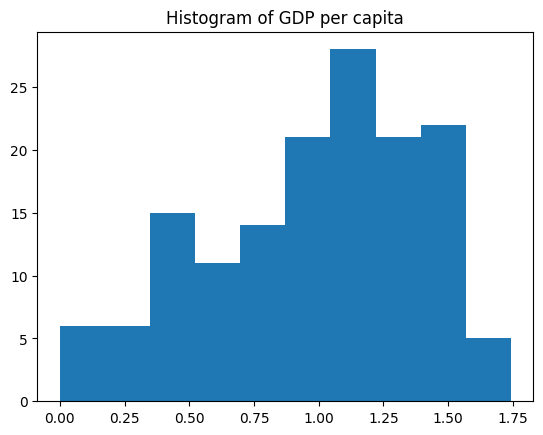

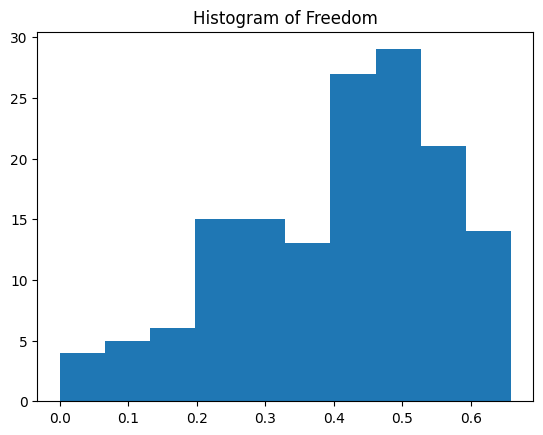

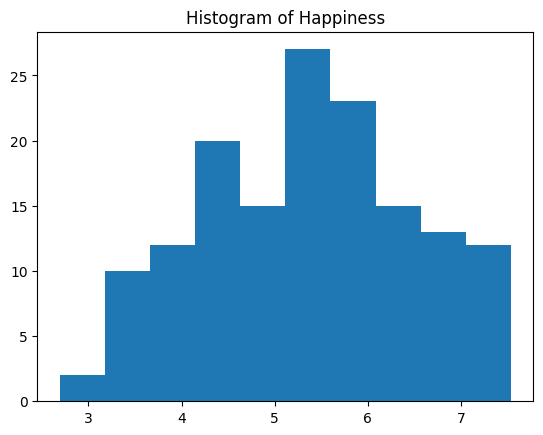

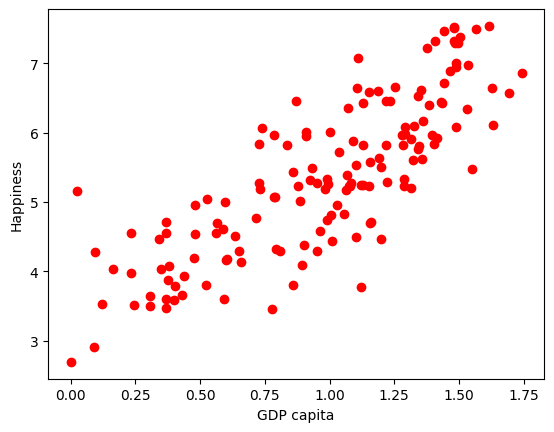

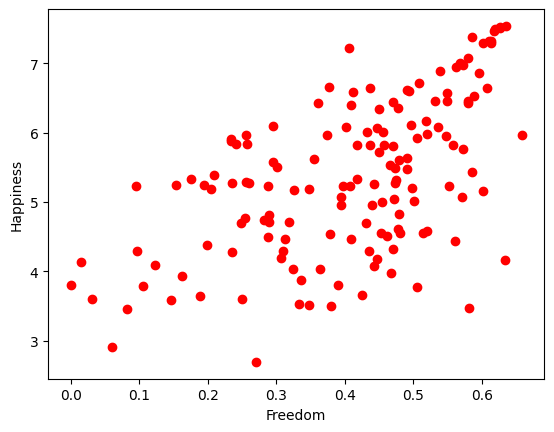

In [3]:
featureNames = ["Economy..GDP.per.Capita.","Freedom"]
outputName = "Happiness.Score"
fileName = 'v3_world-happiness-report-2017.csv'
inputs, outputs = load_data(fileName, featureNames, outputName)
inputs,exc = fromStringToNumericData(inputs)
outputs,exc = fromStringToNumericData(outputs,exc)
plot(inputs,outputs)

In [4]:
regressorLMSR = linear_model.LinearRegression()
inputs2 = [(float(e1), float(e2)) for e1, e2 in zip(inputs[0], inputs[1])]
regressorLMSR.fit(inputs2,outputs)

w0, w1, w2 = regressorLMSR.intercept_, regressorLMSR.coef_[0], regressorLMSR.coef_[1]
print('tool: f(x) = ', w0, '+', w1, '* x1 +', w2, '* x2')

tool: f(x) =  2.549396732496408 + 1.8673876865038541 * x1 + 2.411524450880192 * x2


In [5]:
weights = fit(inputs2,outputs)
print('eu : f(x) = ', weights[0][0], '+', weights[1][0], '* x1 +', weights[2][0], '* x2')

eu : f(x) =  2.549396732496362 + 1.8673876865039034 * x1 + 2.411524450880165 * x2


In [6]:
def plot3Ddata(x1, x2, y, x1Model = None, x2Model = None, yModel = None, x1Test = None, x2Test = None, yTest = None, title = None, featureName1=None, featureName2=None, outputName=None):
    #x1,x2,y = datele de input/output 
    #[X,X,...]
    #x1Model,x2Model,yModel = "xref + yref" AKA _rezultatul_
    #[X,X,...]
    #x1Test,x2Test,yTest = date de input/output "pastrate" pentru testare
    #[X,X,...]

    ax = plt.axes(projection = '3d')

    if (x1):
        plt.scatter(x1, x2, y, c = 'r', marker = 'o', label = 'train data') 

    if (x1Model):
        plt.scatter(x1Model, x2Model, yModel, c = 'b', marker = '_', label = 'learnt model') 

    if (x1Test):
        plt.scatter(x1Test, x2Test, yTest, c = 'g', marker = '^', label = 'test data')  

    if(title):
        plt.title(title)
    else:
        plt.title(featureName1+" vs "+featureName2+" vs "+outputName)
    ax.set_xlabel(featureName1)
    ax.set_ylabel(featureName2)
    ax.set_zlabel(outputName)
    plt.legend()
    plt.show()
    
def get_ref_3w(x1,x2,w0,w1,w2,noOfPoints = 25):
    #x1,x2 = [X,X,...]
    #w0,w1,w2 = float
    xref1 = []
    val = min(x1)
    step1 = (max(x1) - min(x1)) / noOfPoints
    for _ in range(1, noOfPoints):
        for _ in range(1, noOfPoints):
            xref1.append(val)
        val += step1

    xref2 = []
    val = min(x2)
    step2 = (max(x2) - min(x2)) / noOfPoints
    for _ in range(1, noOfPoints):
        aux = val
        for _ in range(1, noOfPoints):
            xref2.append(aux)
            aux += step2

    yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
    
    return xref1,xref2,yref

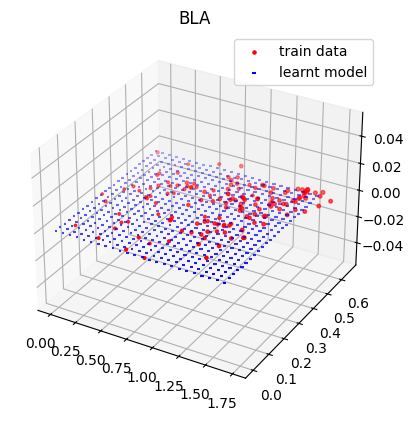

In [7]:
x1ref,x2ref,yref = get_ref_3w(inputs[0],inputs[1],w0,w1,w2)
plot3Ddata(inputs[0],inputs[1],outputs,x1ref,x2ref,yref,title="BLA")